In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('./pca_dataset.csv')
features = df.columns[:-1]
df

# df = pd.read_csv('./cleaned_scaled_dataset.csv',low_memory=False)
# df.drop(columns=['SimillarHTTP'],inplace=True)
# label = df['label']
# df = df.drop(columns=['label'])
# df['label'] = label
# features = df.columns[:-1]
# df



,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_35,component_36,component_37,component_38,component_39,component_40,component_41,component_42,component_43,label
0,-0.832128,-0.088059,-0.698840,0.761996,0.835055,3.247737,-0.413837,0.003974,-0.192102,0.683936,...,0.126703,-0.009124,-0.210058,0.396993,0.130959,-0.287575,0.095065,0.032765,0.018166,ddos_dns
1,-0.876160,-0.020932,-0.772314,0.879109,1.198376,6.181827,-0.728045,-0.038449,-0.082947,0.930899,...,-0.010954,-0.001684,-0.007600,-0.016965,-0.009446,0.012955,0.016273,-0.009212,-0.029705,ddos_dns
2,-0.750347,0.096021,-0.773262,0.700627,1.263897,6.179919,-0.726855,-0.018026,-0.090988,0.896781,...,-0.061639,-0.016413,0.029139,-0.046368,-0.020587,0.042405,0.008767,0.004027,-0.030253,ddos_dns
3,-0.809721,0.042395,-0.772720,0.783227,1.233652,6.179669,-0.726962,-0.028140,-0.086581,0.912450,...,-0.038108,-0.009564,0.012282,-0.032897,-0.015617,0.028928,0.012277,-0.002218,-0.030435,ddos_dns
4,-0.879106,-0.023349,-0.772337,0.883042,1.196988,6.181764,-0.728011,-0.038990,-0.082713,0.931632,...,-0.009830,-0.001369,-0.008380,-0.016326,-0.009215,0.012338,0.016427,-0.009518,-0.029780,ddos_dns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64234,3.785389,2.767239,-8.244867,10.633640,-13.595652,-0.284028,-0.633267,-1.760388,9.474568,1.920955,...,-2.260085,-1.760453,-0.084610,0.252724,0.421045,-1.070907,-0.101436,-1.071592,0.171236,benign
64235,3.800445,2.768903,-8.252918,10.635273,-13.603882,-0.287513,-0.639869,-1.743232,9.452619,1.924382,...,-2.264797,-1.746063,-0.075861,0.248461,0.417328,-1.068741,-0.100216,-1.069784,0.166891,benign
64236,3.512893,2.704706,-8.261023,10.750158,-13.728442,-0.644323,-0.490252,-1.934655,9.680377,1.881334,...,-2.658233,-1.832537,-0.057031,0.027634,0.388342,-1.058058,0.207089,-1.043778,0.048973,benign
64237,3.281027,2.831227,-8.589625,12.877938,-13.933053,-0.060849,-0.190775,-0.176820,-1.688525,0.622677,...,-1.698167,-0.944359,-0.006832,-0.703931,0.328570,-0.596643,0.015360,0.110430,-0.275555,benign


### Note
We performed two different analysis:

- The first analysis is a binary problem where we divided the dataset in malicious and benign traffic for a general detection of malicious traffic.
- The second analysis is a multi-class problem where we used the original labels to perform predictions about the particular type of attacks.

In this first stage we just performed one split in train and validation and used default parameters to get an idea of which of the algorithm may suit better for our machine learning problem

In [3]:
# For binary classification: Logistic regression, svm, knn, gaussian naive bayes classifier
# For classification: Decision tree, Random forest, k-NN

#"1" malicious
#"0" benign

df_binary = df.copy()
df_binary.loc[df_binary['label']!='benign','label'] = 'malicious'
df_binary['numLabel'] = pd.Categorical(df_binary['label']).codes
df_binary.drop(columns=['label'],inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    df[features], # X
    df['label'], # y
    stratify = df['label'], # stratify the dataset based on class labels
    train_size = 0.7, # percentage of training set
    random_state = 10
)

X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(
    df_binary[features], # X
    df_binary['numLabel'], # y
    stratify = df_binary['numLabel'], # stratify the dataset based on class labels
    train_size = 0.7, # percentage of training set
    random_state = 10
)



# Binary Classification
### Logistic regression

Accuracy of LR on train: 99.9777614695221%
Accuracy of LR on test: 99.97924449979244%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1697
           1       1.00      1.00      1.00     17575

    accuracy                           1.00     19272
   macro avg       1.00      1.00      1.00     19272
weighted avg       1.00      1.00      1.00     19272



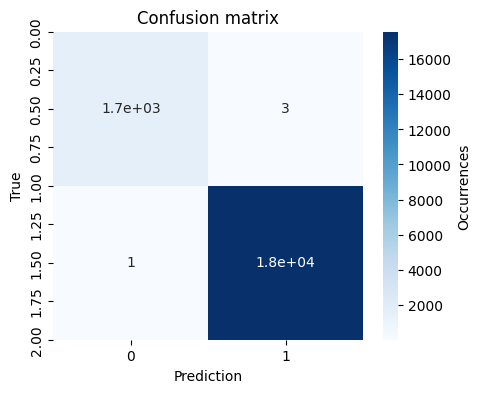

In [6]:
#Logistic regression (binary)

lr_clf = LogisticRegression()

lr_clf.fit(X_binary_train, y_binary_train)
y_binary_log_pred = lr_clf.predict(X_binary_train)
accuracy = accuracy_score(y_binary_train, y_binary_log_pred)
print(f"Accuracy of LR on train: {accuracy*100}%")

y_binary_log_pred_test = lr_clf.predict(X_binary_test)
accuracy = accuracy_score(y_binary_test, y_binary_log_pred_test)
print(f"Accuracy of LR on test: {accuracy*100}%")


print(classification_report(y_binary_test, y_binary_log_pred_test))

confusion_test = confusion_matrix(y_binary_test, y_binary_log_pred_test)
# visualize the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.yscale('linear')
plt.title('Confusion matrix')
plt.show()


### SVM

Accuracy of SVM on train: 99.99555229390442%
Accuracy of SVM on test: 99.92216687422167%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1697
           1       1.00      1.00      1.00     17575

    accuracy                           1.00     19272
   macro avg       1.00      1.00      1.00     19272
weighted avg       1.00      1.00      1.00     19272



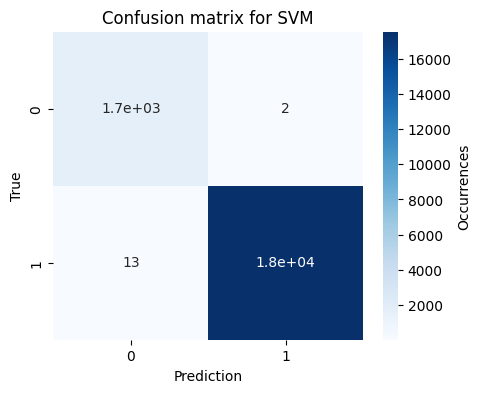

In [5]:
svm_clf = SVC()
svm_clf.fit(X_binary_train, y_binary_train)

y_binary_svm_pred_train = svm_clf.predict(X_binary_train)
accuracy_train = accuracy_score(y_binary_train, y_binary_svm_pred_train)
print(f"Accuracy of SVM on train: {accuracy_train*100}%")

# Predictions and evaluation on the test set
y_binary_svm_pred_test = svm_clf.predict(X_binary_test)
accuracy_test = accuracy_score(y_binary_test, y_binary_svm_pred_test)
print(f"Accuracy of SVM on test: {accuracy_test*100}%")

# Classification report on the test set
print(classification_report(y_binary_test, y_binary_svm_pred_test))

# Confusion matrix visualization
confusion_svm_test = confusion_matrix(y_binary_test, y_binary_svm_pred_test)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_svm_test, cmap='Blues', annot=True, cbar_kws={'label': 'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix for SVM')
plt.show()


### KNN

Accuracy of KNN on train: 99.98665688171326%
Accuracy of KNN on test: 99.97924449979244%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1697
           1       1.00      1.00      1.00     17575

    accuracy                           1.00     19272
   macro avg       1.00      1.00      1.00     19272
weighted avg       1.00      1.00      1.00     19272



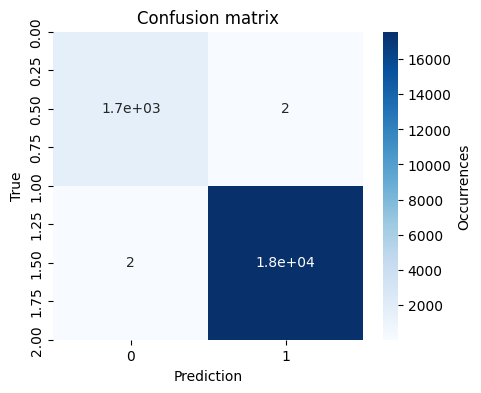

In [7]:
#KNN (binary)
 
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_binary_train, y_binary_train)
y_binary_knn_pred_train = knn_classifier.predict(X_binary_train)
accuracy = accuracy_score(y_binary_train, y_binary_knn_pred_train)
print(f'Accuracy of KNN on train: {accuracy*100}%')
 
y_binary_knn_pred_test = knn_classifier.predict(X_binary_test)
accuracy = accuracy_score(y_binary_test, y_binary_knn_pred_test)
print(f'Accuracy of KNN on test: {accuracy*100}%')

print(classification_report(y_binary_test, y_binary_knn_pred_test))
confusion_test = confusion_matrix(y_binary_test, y_binary_knn_pred_test)
# visualize the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.yscale('linear')
plt.title('Confusion matrix')
plt.show()


### GNB

Accuracy of LR on train: 96.57749015945026%
Accuracy of LR on test: 96.58053134080531%
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1697
           1       1.00      0.96      0.98     17575

    accuracy                           0.97     19272
   macro avg       0.86      0.98      0.91     19272
weighted avg       0.98      0.97      0.97     19272



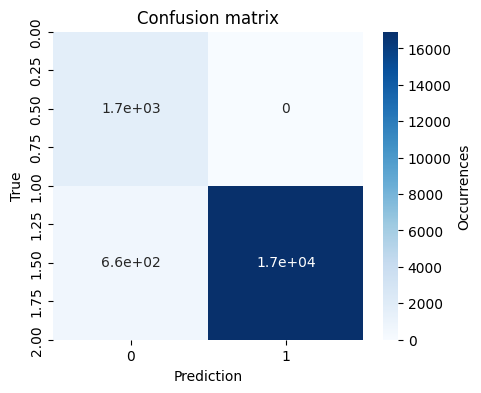

In [8]:

#Gaussian NB (binary)

gnb_clf = GaussianNB(var_smoothing=6.579332246575682e-09) 
gnb_clf.fit(X_binary_train, y_binary_train)
y_binary_gauss_pred_train = gnb_clf.predict(X_binary_train)
accuracy = accuracy_score(y_binary_train, y_binary_gauss_pred_train)
print(f"Accuracy of LR on train: {accuracy*100}%")

y_binary_gauss_pred_test = gnb_clf.predict(X_binary_test)
accuracy = accuracy_score(y_binary_test, y_binary_gauss_pred_test)
print(f"Accuracy of LR on test: {accuracy*100}%")

confusion_test = confusion_matrix(y_binary_test, y_binary_gauss_pred_test)
print(classification_report(y_binary_test, y_binary_gauss_pred_test))
# visualize the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.yscale('linear')
plt.title('Confusion matrix')
plt.show()




# Multi Class Analysis
### KNN

Accuracy of KNN on train: 99.46849912157805%
Accuracy of KNN on test: 99.05562474055625%
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00      1697
    ddos_dns       0.98      0.97      0.98      1611
   ddos_ldap       0.97      0.99      0.98      1779
  ddos_mssql       0.99      0.98      0.98      1773
ddos_netbios       0.99      0.99      0.99      1749
    ddos_ntp       0.92      0.98      0.95       296
   ddos_snmp       1.00      1.00      1.00      1795
   ddos_ssdp       1.00      0.99      1.00      1791
    ddos_syn       0.99      0.99      0.99      1644
   ddos_tftp       0.99      0.99      0.99      1578
    ddos_udp       1.00      1.00      1.00      1763
ddos_udp_lag       1.00      1.00      1.00      1796

    accuracy                           0.99     19272
   macro avg       0.99      0.99      0.99     19272
weighted avg       0.99      0.99      0.99     19272



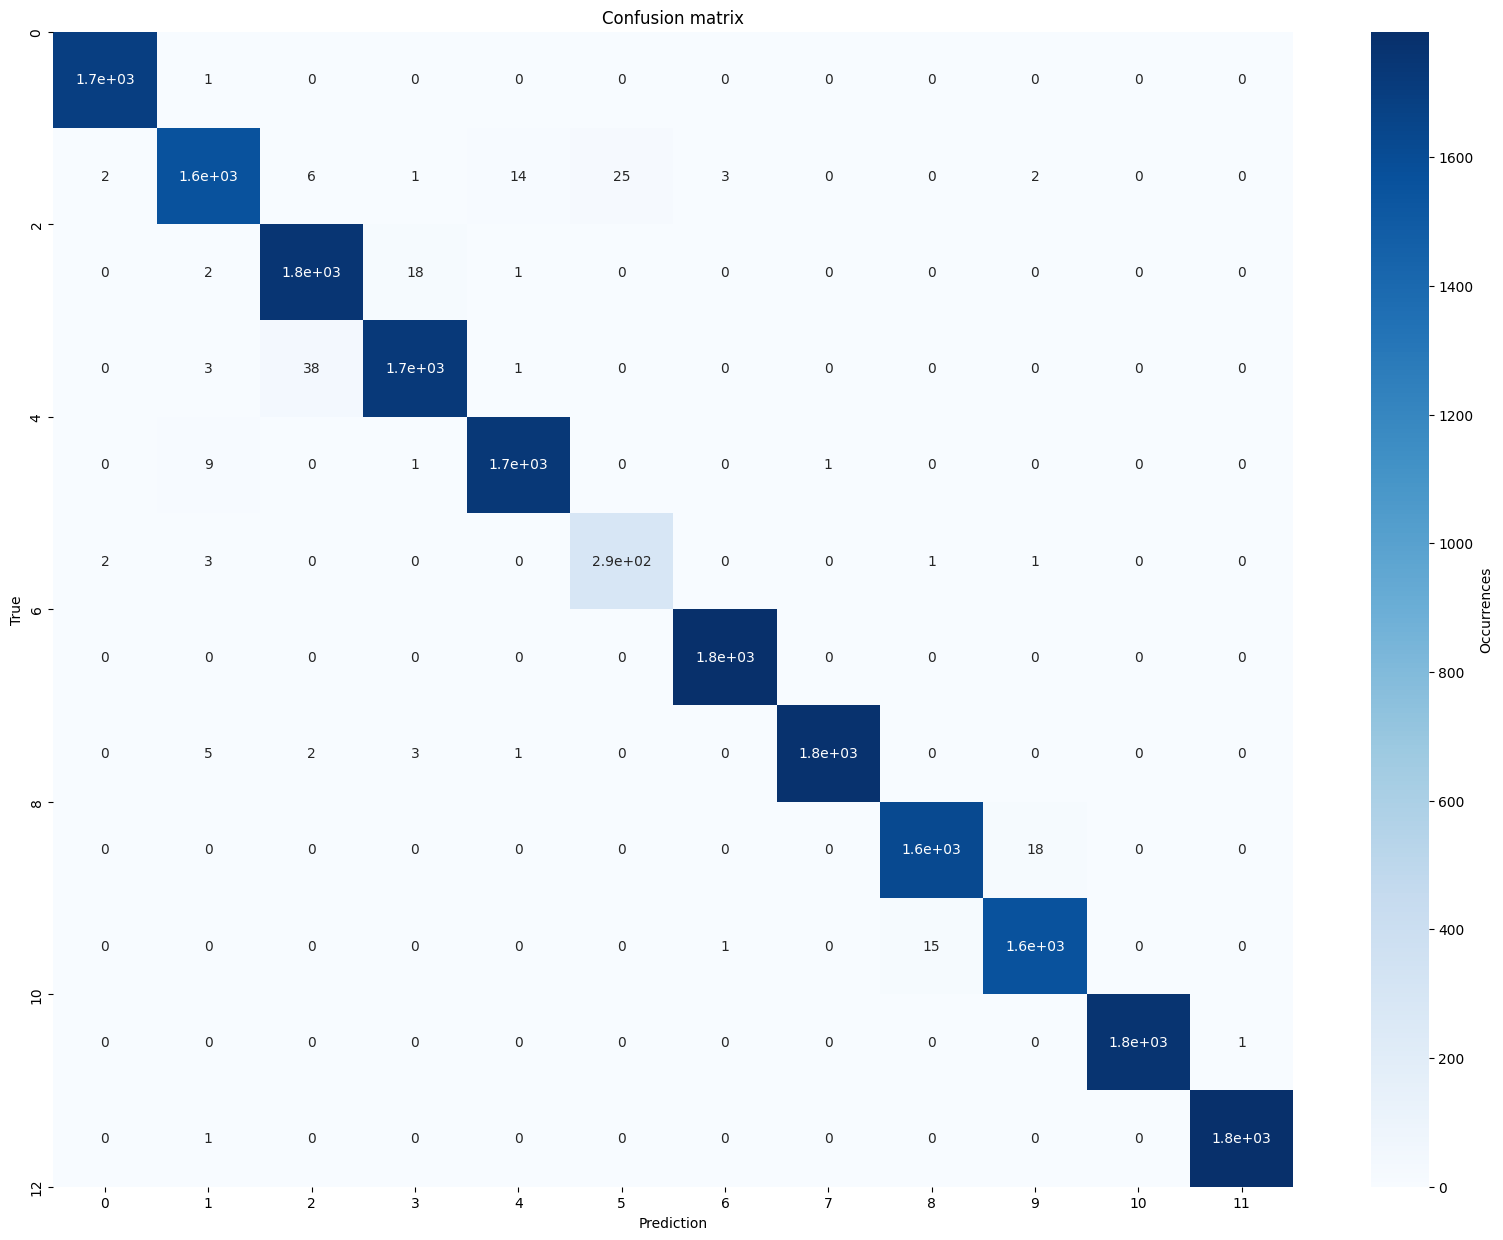

In [9]:
#KNN (non binary)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

y_knn_pred_train = knn_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_knn_pred_train)
print(f'Accuracy of KNN on train: {accuracy*100}%')
 
y_knn_pred_test = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_knn_pred_test)
print(f'Accuracy of KNN on test: {accuracy*100}%')

print(classification_report(y_test, y_knn_pred_test))
confusion_test = confusion_matrix(y_test, y_knn_pred_test)
# visualize the confusion matrix
plt.figure(figsize=(20,15))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.yscale('linear')
plt.title('Confusion matrix')
plt.show()



### Decision Tree

Accuracy of dt on train: 100.0%
Accuracy of dt on test: 99.53300124533001%
              precision    recall  f1-score   support

      benign       0.99      1.00      1.00      1697
    ddos_dns       1.00      0.99      0.99      1611
   ddos_ldap       1.00      1.00      1.00      1779
  ddos_mssql       0.99      1.00      1.00      1773
ddos_netbios       1.00      1.00      1.00      1749
    ddos_ntp       0.95      0.96      0.95       296
   ddos_snmp       1.00      1.00      1.00      1795
   ddos_ssdp       1.00      1.00      1.00      1791
    ddos_syn       0.99      0.99      0.99      1644
   ddos_tftp       0.99      0.99      0.99      1578
    ddos_udp       1.00      1.00      1.00      1763
ddos_udp_lag       1.00      1.00      1.00      1796

    accuracy                           1.00     19272
   macro avg       0.99      0.99      0.99     19272
weighted avg       1.00      1.00      1.00     19272



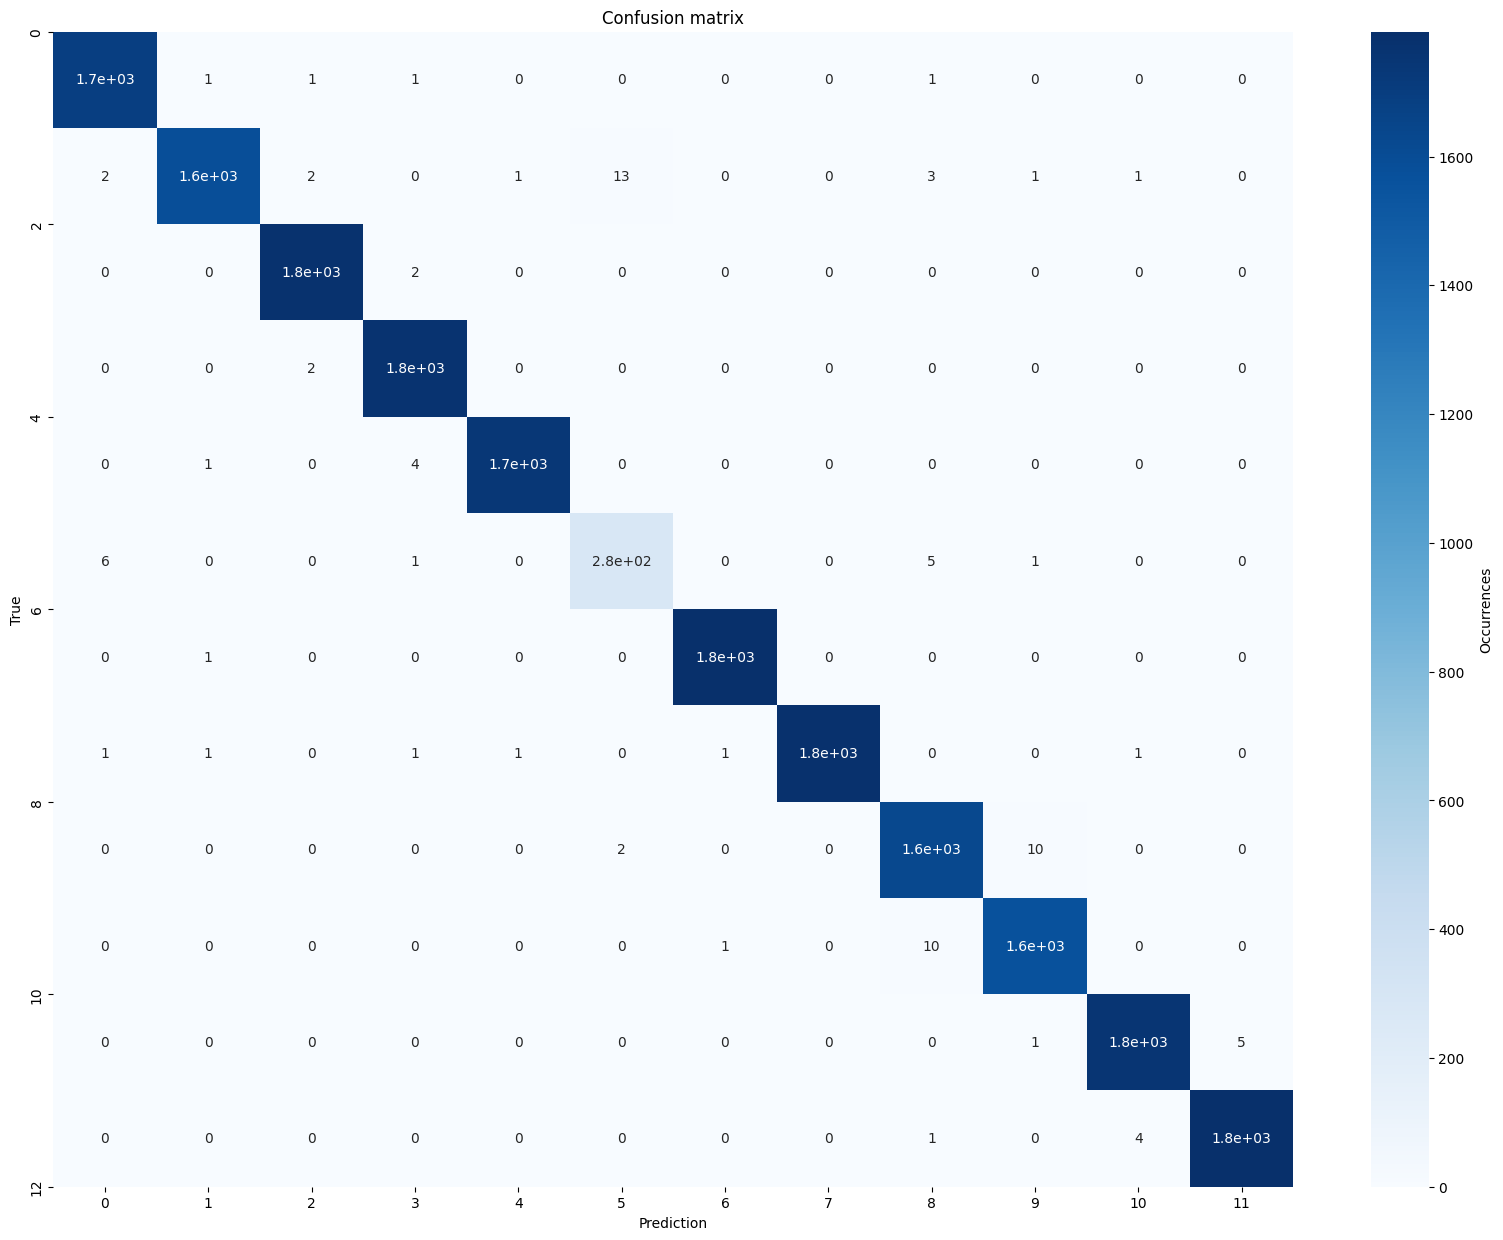

In [10]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_dt_pred_train = dt_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_dt_pred_train)
print(f'Accuracy of dt on train: {accuracy*100}%')
 
y_dt_pred_test = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_dt_pred_test)
print(f'Accuracy of dt on test: {accuracy*100}%')

print(classification_report(y_test, y_dt_pred_test))
confusion_test = confusion_matrix(y_test, y_dt_pred_test)
# visualize the confusion matrix
plt.figure(figsize=(20,15))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.yscale('linear')
plt.title('Confusion matrix')
plt.show()

### Random Forest

Accuracy of rf on train: 100.0%
Accuracy of rf on test: 99.73536737235368%
              precision    recall  f1-score   support

      benign       0.99      1.00      1.00      1697
    ddos_dns       1.00      0.99      0.99      1611
   ddos_ldap       1.00      1.00      1.00      1779
  ddos_mssql       1.00      1.00      1.00      1773
ddos_netbios       1.00      1.00      1.00      1749
    ddos_ntp       0.97      0.97      0.97       296
   ddos_snmp       1.00      1.00      1.00      1795
   ddos_ssdp       1.00      1.00      1.00      1791
    ddos_syn       1.00      1.00      1.00      1644
   ddos_tftp       1.00      1.00      1.00      1578
    ddos_udp       1.00      1.00      1.00      1763
ddos_udp_lag       1.00      1.00      1.00      1796

    accuracy                           1.00     19272
   macro avg       1.00      1.00      1.00     19272
weighted avg       1.00      1.00      1.00     19272



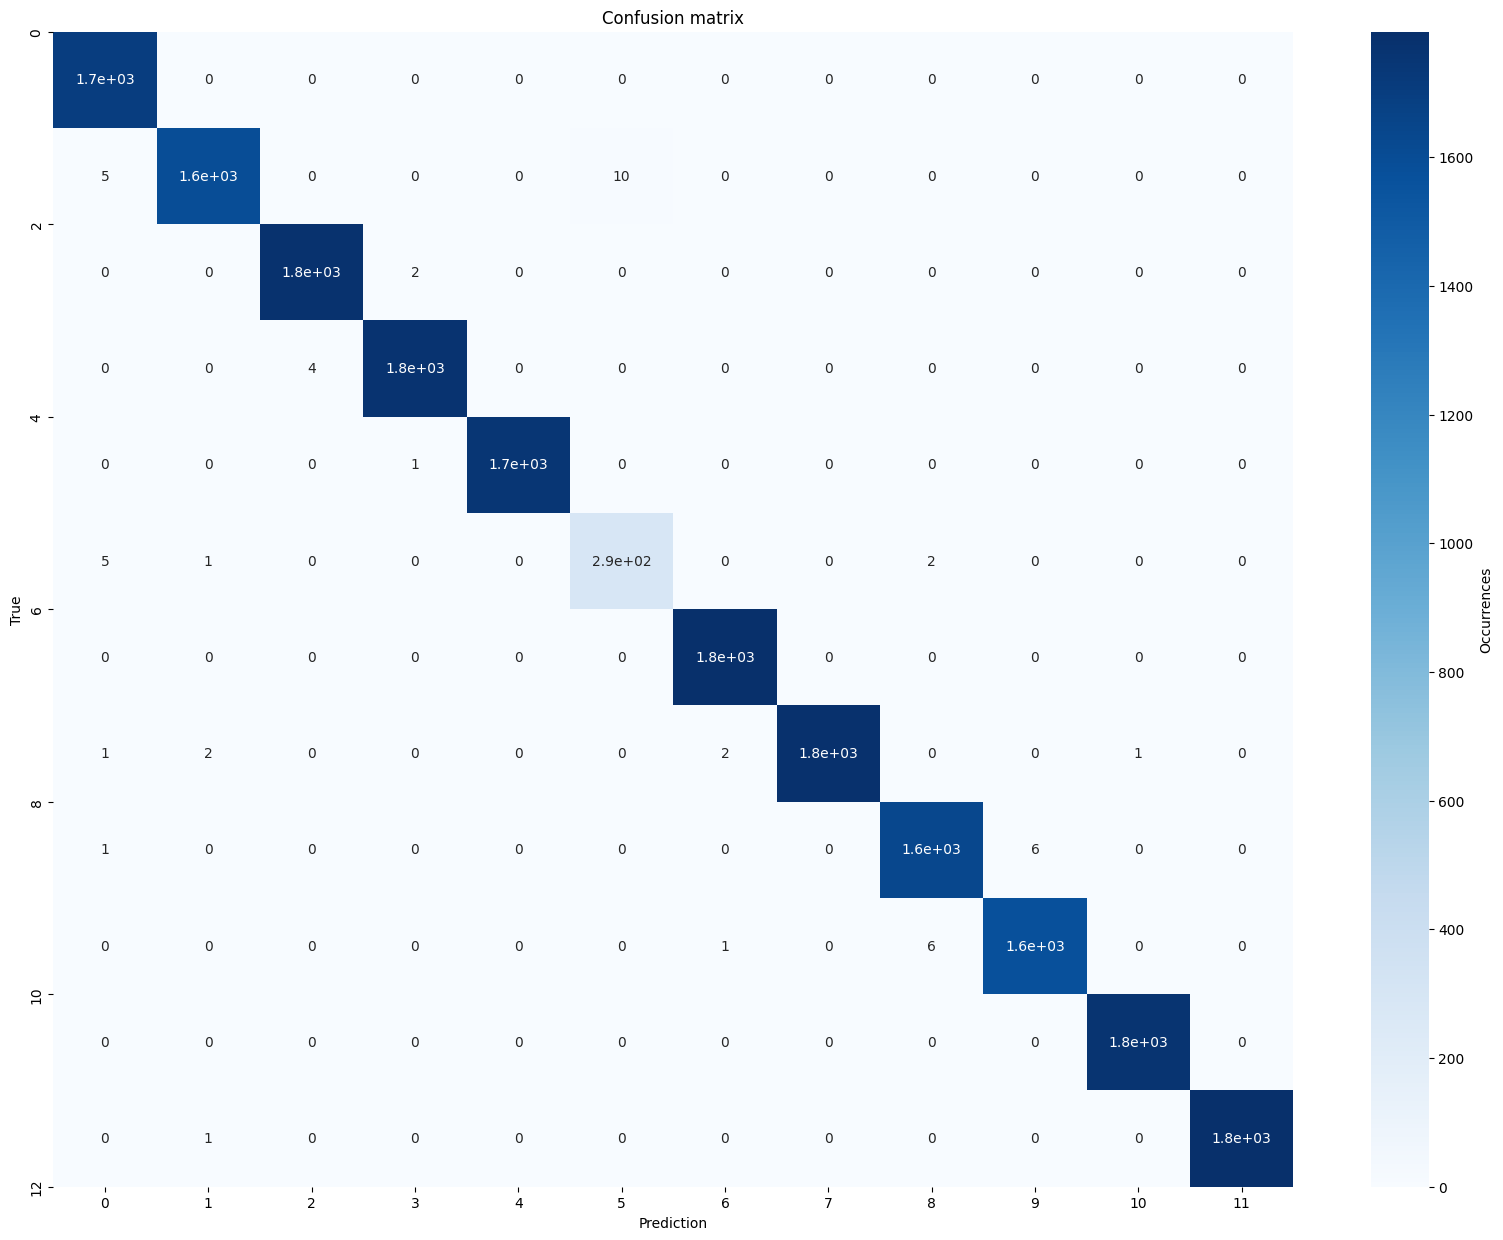

In [11]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_rf_pred_train = rf_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_rf_pred_train)
print(f'Accuracy of rf on train: {accuracy*100}%')

y_rf_pred_test = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_rf_pred_test)
print(f'Accuracy of rf on test: {accuracy*100}%')

print(classification_report(y_test, y_rf_pred_test))
confusion_test = confusion_matrix(y_test, y_rf_pred_test)
# visualize the confusion matrix
plt.figure(figsize=(20,15))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.yscale('linear')
plt.title('Confusion matrix')
plt.show()
